In [ ]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

## **HW1**

### **“Where Do We Come From? What Are We? Where Are We Going?”.**

> Phylogenetics, human evolution.

**Steps:**


1.   Alignment using MAFFT (or MUSCLE, CLUSTAL W, prank etc)
2.   Tree reconstruction using IQTree (or FastTree, MEGA etc)
3.   Root the tree (add Neanderthal and Denisovan samples as outgroup)
4.   Tree visualization using UGENE (or MEGA, Python, R etc)

Data:
* Human mtDNA data *([click here for data](https://figshare.com/ndownloader/files/30768763))*

For outgroup:
* Neanderthal samples *([click here for data](https://figshare.com/ndownloader/files/30768766))*

* Denisovan samples *([click here for data](https://figshare.com/ndownloader/files/30768775))*



### **Step 0. Making merged fasta file**

For alignment you should have all your sequences in 1 file.

In [ ]:
!cat /content/input_fasta/*.fasta > /content/merged.fasta

### **Step 1. Multiple alignment**

We will use MAFFT programe for that here.

In [ ]:
!conda create -n mafft

Channels:
 - defaults
Platform: linux-64
Solving environment: / done

## Package Plan ##

  environment location: /usr/local/envs/mafft



Proceed ([y]/n)? y

Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done
#
# To activate this environment, use
#
#     $ conda activate mafft
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate mafft && conda install mafft -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local/envs/mafft

  added / updated specs:
    - mafft


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    gawk-5.3.1                 |       hcd3d067_0         1.1 MB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    libasprintf-0.22.5         |       he8f35ee_3          42 KB  conda-forge
    libgcc-14.1.0              |       h77fa898_1         827 KB  conda-forge
    libgcc-ng-14.1.0           |       h69a702a_1          51 KB  conda-forge
    libgettextpo-0.22.5        |       he02047a_3         167 KB  conda-forge
    libgomp-14.1.0     

In [ ]:
!source activate mafft && mafft --help

------------------------------------------------------------------------------
  MAFFT v7.526 (2024/Apr/26)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

In [ ]:
!source activate mafft && mafft --auto /content/merged.fasta > /content/aligned.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 10 ambiguous characters.
    1 / 45
done.

Constructing a UPGMA tree (efffree=0) ... 
   40 / 45
done.

Progressive alignment 1/2... 
STEP    37 / 44  f
Reallocating..done. *alloclen = 34158
STEP    44 / 44  f
done.

Making a distance matrix from msa.. 
    0 / 45
done.

Constructing a UPGMA tree (efffree=1) ... 
   40 / 45
done.

Progressive alignment 2/2... 
STEP    34 / 44  f
Reallocating..done. *alloclen = 34158
STEP    44 / 44  f
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' 

### **Step 2. Tree reconstruction**

We will use IQTree programe for that here. The programme will suggest the best model for our tree at this step.

It's also important to add the bootstrap support values.

In [ ]:
!conda create -n iqtree

Channels:
 - defaults
Platform: linux-64
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local/envs/iqtree



Proceed ([y]/n)? y

Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
#
# To activate this environment, use
#
#     $ conda activate iqtree
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [ ]:
!source activate iqtree && conda install iqtree -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local/envs/iqtree

  added / updated specs:
    - iqtree


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    iqtree-2.3.6               |       hdbdd923_0         4.0 MB  bioconda
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  iqtree             bioconda/linux-64::iqtree-2.3.6-hdbdd923_0 
  libgcc             conda-forge/linux-64::libgcc-14.1.0-h77fa898_1 
  libgcc-ng          conda-forge/linux-64::libgcc-ng-14.1.0-h69a702a_1 
  libgomp            conda-forge/linux-64::l

In [ ]:
!source activate iqtree && iqtree -h

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Usage: iqtree [-s ALIGNMENT] [-p PARTITION] [-m MODEL] [-t TREE] ...

GENERAL OPTIONS:
  -h, --help           Print (more) help usages
  -s FILE[,...,FILE]   PHYLIP/FASTA/NEXUS/CLUSTAL/MSF alignment file(s)
  -s DIR               Directory of alignment files
  --seqtype STRING     BIN, DNA, AA, NT2AA, CODON, MORPH (default: auto-detect)
  -t FILE|PARS|RAND    Starting tree (default: 99 parsimony and BIONJ)
  -o TAX[,...,TAX]     Outgroup taxon (list) for writing .treefile
  --prefix STRING      Prefix for all output files (default: aln/partition)
  --seed NUM           Random seed number, normally used for debugging purpose
  --safe               Safe likelihood kernel to avoid numerical underflow
  --mem NUM[G|M|%]     Maximal RAM usage in GB | MB | %
  --runs NUM           Nu

In [ ]:
!source activate iqtree && iqtree -s /content/aligned.fasta -m TEST -bb 1000 -nt AUTO

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    97a7fe3e1a76 (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/aligned.fasta -m TEST -bb 1000 -nt AUTO
Seed:    378535 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Mon Sep 23 19:38:05 2024
Kernel:  AVX+FMA - auto-detect threads (2 CPU cores detected)

Reading alignment file /content/aligned.fasta ... Fasta format detected
Reading fasta file: done in 0.0134153 secs using 90.17% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 45 sequences with 16583 columns, 357 distinct patterns
195 parsimony-informative, 349 singleton sites, 16039 constant sites
            Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 5.776e-05 secs using 98.68% CPU
   1  JQ247408.1    0.10%    passed     99.93%
   2  KX459697.1    0.10%   



> And IQTree decided that the best model for our case is... **TN+F+I+G4 chosen according to BIC**



### Let's see what we've got that far.



```
+----------JQ247408.1
|
+---KX459697.1
|
|                     +------------KP172434.1
|                  +--| (95)
|                  |  +------JF499899.1
|               +--| (80)
|               |  +-------------KY686210.1
|            +--| (75)
|            |  |             +-------HQ914447.1
|            |  |        +----| (100)
|            |  |        |    |  +---------KX440262.1
|            |  |        |    +--| (97)
|            |  |        |       +-----KX440275.1
|            |  |     +--| (97)
|            |  |     |  |      +----JF837819.1
|            |  |     |  +------| (100)
|            |  |     |         |  +--KX440315.1
|            |  |     |         +--| (99)
|            |  |     |            +--JN419195.1
|            |  |  +--| (85)
|            |  |  |  +-----------KY303770.1
|            |  +--| (56)
|            |     |         +-------KT698008.1
|            |     |  +------| (100)
|            |     |  |      +----HQ189135.1
|            |     +--| (94)
|            |        |  +---------------KT698006.1
|            |        +--| (76)
|            |           +---------HM804485.1
|         +--| (72)
|         |  |        +---KY934476.1
|         |  |     +--| (87)
|         |  |     |  +--KY077676.1
|         |  |  +--| (56)
|         |  |  |  +-----KP340170.1
|         |  +--| (88)
|         |     |  +--JF343123.1
|         |     +--| (100)
|         |        +----KY496869.1
|      +--| (78)
|      |  |  +---------HQ259121.1
|      |  +--| (97)
|      |     +----------KU521454.1
+------| (100)
       |                           +-----KP017255.1
       |                    +------| (100)
       |                    |      +-------JF811749.1
       |                 +--| (91)
       |                 |  +------------KM986625.1
       |              +--| (98)
       |              |  |      +--------KP172432.1
       |              |  |  +---| (99)
       |              |  |  |   +-----JN084079.1
       |              |  +--| (93)
       |              |     +---------KY686209.1
       |           +--| (97)
       |           |  |         +----------------------------------------FJ713601.1
       |           |  |     +---| (99)
       |           |  |     |   |    +-----------KR135883.1
       |           |  |     |   +----| (97)
       |           |  |     |        +------------------------KR135861.1
       |           |  |  +--| (93)
       |           |  |  |  +---------------KM986608.1
       |           |  +--| (83)
       |           |     +-------KT819263.1
       |        +--| (70)
       |        |  |         +--------KY348642.1
       |        |  |    +----| (100)
       |        |  |    |    |  +----GU590993.1
       |        |  |    |    +--| (80)
       |        |  |    |       +---KY369152.2
       |        |  +----| (100)
       |        |       +---------KM986616.1
       |     +--| (61)
       |     |  |           +--KU521494.1
       |     |  +-----------| (100)
       |     |              +--KU521491.1
       |  +--| (30)
       |  |  +---------JN084084.1
       +--| (22)
          |             +--KU508374.1
          |  +----------| (100)
          |  |          +----KY934478.1
          +--| (86)
             |    +---HM453712.1
             +----| (99)
                  +-------HM448049.1

```



### **Rename the taxas**

To do that we can use Python code but in different collab, cause BioPython and conda don't want to work together.



```
from Bio import Phylo

# Функция для изменения названий таксонов
def change_taxon_names(tree, name_mapping):
    for clade in tree.find_clades():
        if clade.name in name_mapping:
            clade.name = name_mapping[clade.name]

# Путь к вашему файлу Newick
input_file = '/content/aligned.fasta.treefile'

# Путь к выходному файлу
output_file = '/content/aligned_newtax.fasta.treefile'

# Словарь для сопоставления старых и новых названий таксонов
name_mapping = {
    'JQ247408.1': 'A2f1a Native American',
    'KX459697.1': 'A4-A200G Chinese',
    'KP172434.1': 'B2 Argentinian',
    'KP017255.1': 'C1d3 Uruguayan',
    'JF811749.1': 'C4a1 Turkish',
    'KP172432.1': 'D1 Argentinian',
    'JN084079.1': 'D4e1a1 Chinese',
    'HQ259121.1': 'F1a3 Filipino',
    'KU521454.1': 'F3b1 Taiwanese',
    'KY934476.1': 'H1h1 Finnish',
    'JF499899.1': 'B4d1 Chinese',
    'KP340170.1': 'HV4a1 Iranian',
    'KY077676.1': 'H7j1 Ashkenazi',
    'GU590993.1': 'I3 Irish',
    'KY369152.1': 'I4a Irish',
    'HQ914447.1': 'J1b Armenian',
    'KX440262.1': 'J2a2d1 Tunisian',
    'KX440275.1': 'J2b1 Russian',
    'KT698008.1': 'K1a4a1 Serbian',
    'HQ189135.1': 'K2a3 Dutch',
    'FJ713601.1': 'L1c1d Central African',
    'KR135883.1': 'L2a1a Mozambican',
    'KR135861.1': 'L2e1 Sudanese',
    'KT819263.1': 'L3e5a1 Morocco',
    'KM986608.1': 'L4b2a1 Yemeni',
    'KM986625.1': 'M23 Yemeni',
    'KY686209.1': 'M60 Indonesian',
    'KY348642.1': 'I1a1a3 Scottish',
    'JN084084.1': 'N9a10 Chinese',
    'KY303770.1': 'R2c Saudi Arabian',
    'KY686210.1': 'R6 Thai',
    'JF837819.1': 'T1a1 Finnish',
    'KX440315.1': 'T2a1a Turkish',
    'JN419195.1': 'T2b16 French',
    'KT698006.1': 'U2e2a4 Serbian',
    'HM804485.1': 'U6a7a1 English',
    'KY496869.1': 'V Finnish',
    'JF343123.1': 'V3b1 English',
    'KU508374.1': 'W1c Swedish',
    'KY934478.1': 'W6 Bulgarian',
    'HM453712.1': 'X2B American',
    'HM448049.1': 'X2d Polish',
    'KU521494.1': 'Y2a1 Indonesian',
    'KM986616.1': 'N1a1a3 Yemeni',
    'KU521491.1': 'Y2a1 Malaysian',
    'KT780370.1': 'KT780370 Denisova',
    'FN673705.1': 'FN673705 Denisova',
    'FR695060.1': 'FR695060 Denisova',
    'KX198088.1': 'GoyetQ57-2 Neanderthal',
    'KX198087.1': 'GoyetQ305-4 Neanderthal',
    'KX198086.1': 'GoyetQ305-7 Neanderthal',
    'KX198085.1': 'GoyetQ374a-1 Neanderthal',
    'KX198084.1': 'GoyetQ56-1 Neanderthal',
    # Добавьте другие пары старых и новых названий таксонов
}

# Чтение дерева из файла
tree = Phylo.read(input_file, 'newick')

# Изменение названий таксонов
change_taxon_names(tree, name_mapping)

# Запись измененного дерева в файл
Phylo.write(tree, output_file, 'newick')

print(f"Измененное дерево сохранено в файл: {output_file}")
```



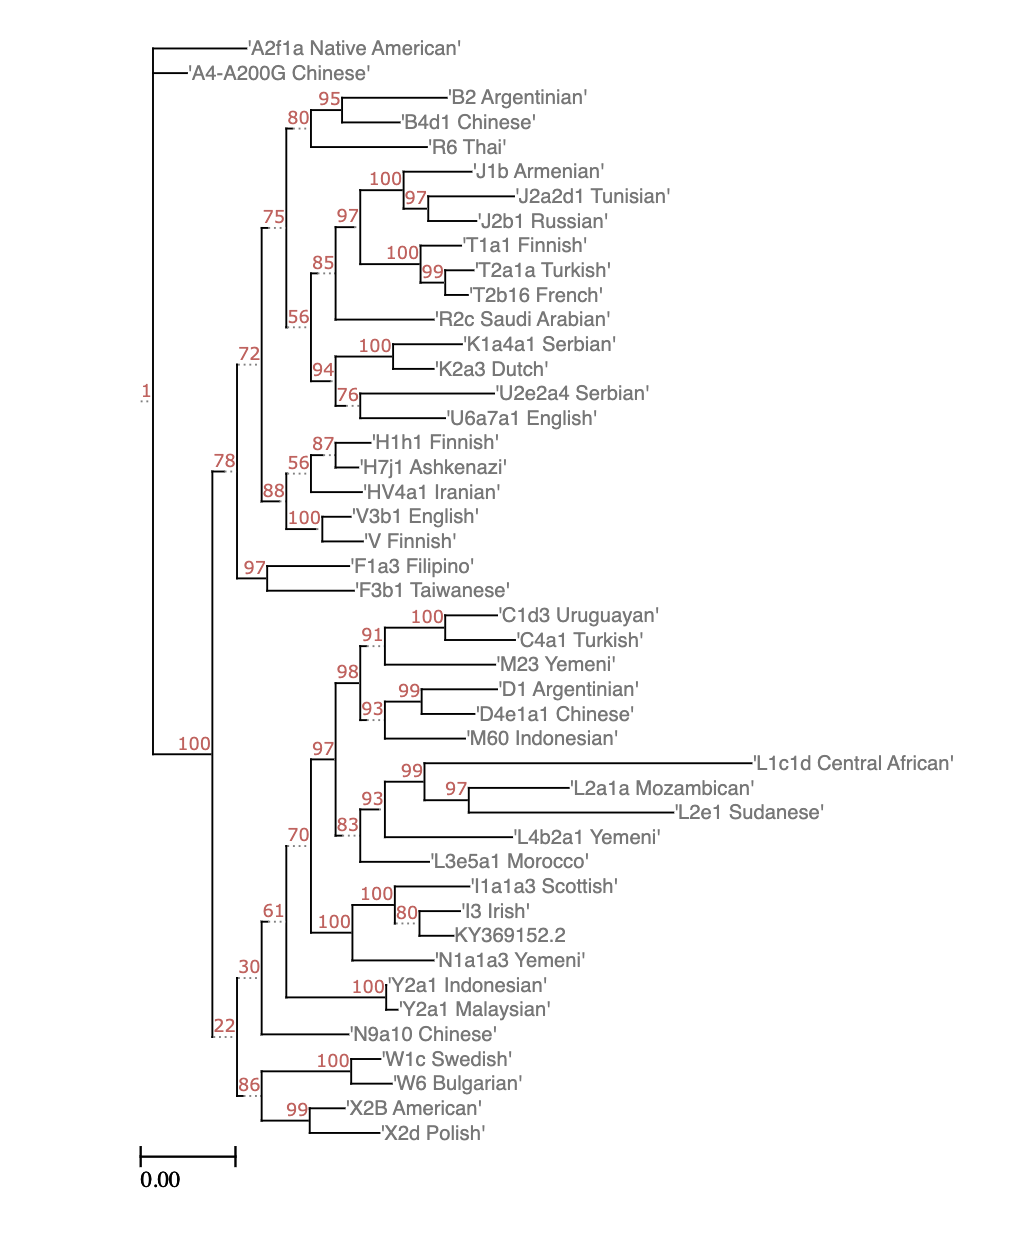

### **Step 3. Root the tree**

To root our tree it's important to get the right outgroup. In that case we have five Neanderthal samples and three Denisovan samples.

**Step 3.1. Merge the outgroup**

In [ ]:
!cat /content/outgroup_fasta/*.fasta > /content/merged_outgroup.fasta

**Step 3.2. Add outgroup to our alignment**

We are not going to redo it comletely, just add it to what we already have. We can do it with `--add` parameter in MAFFT.




In [ ]:
!source activate mafft && mafft --add /content/merged_outgroup.fasta --reorder /content/aligned.fasta > /content/extended_alignment.fasta

nadd = 8
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 27 ambiguous characters.
    1 / 53
done.

Constructing a UPGMA tree (efffree=0) ... 
   50 / 53
done.

Progressive alignment 1/2... 
STEP    52 / 52  f
done.

Making a distance matrix from msa.. 
    0 / 53
done.

Constructing a UPGMA tree (efffree=1) ... 
   50 / 53
done.

Progressive alignment 2/2... 
STEP    52 / 52  f
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to

In [ ]:
#Just checking
!du -sh /content/aligned.fasta

**Step 3.3. Reconstruct tree with outgoup (using the previous tree)❌**

As we did it with alignment, at this step we are also not going to redo it completely. We will use the best model for the previous tree.

In [ ]:
!source activate iqtree && iqtree -s /content/extended_alignment.fasta -g /content/iqtree_results/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    97a7fe3e1a76 (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/extended_alignment.fasta -g /content/iqtree_results/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370
Seed:    967062 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Mon Sep 23 20:21:02 2024
Kernel:  AVX+FMA - 1 threads (2 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 2 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /content/extended_alignment.fasta ... Fasta format detected
Reading fasta file: done in 0.0297304 secs using 79.17% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 53 sequences with 16592 



```

                                          +--JQ247408.1
                                       +--|
                                       |  +--KX459697.1
                                    +**| (100)
                                    |  |              +--KY934476.1
                                    |  |           +--| (87)
                                    |  |           |  +--KY077676.1
                                    |  |        +**| (56)
                                    |  |        |  +--KP340170.1
                                    |  |     +--| (88)
                                    |  |     |  |  +--JF343123.1
                                    |  |     |  +--| (100)
                                    |  |     |     +--KY496869.1
                                    |  |  +**| (72)
                                    |  |  |  |        +--KY303770.1
                                    |  |  |  |     +**| (85)
                                    |  |  |  |     |  |     +--JF837819.1
                                    |  |  |  |     |  |  +--| (100)
                                    |  |  |  |     |  |  |  |  +--KX440315.1
                                    |  |  |  |     |  |  |  +--| (99)
                                    |  |  |  |     |  |  |     +--JN419195.1
                                    |  |  |  |     |  +--| (97)
                                    |  |  |  |     |     |  +--HQ914447.1
                                    |  |  |  |     |     +--| (100)
                                    |  |  |  |     |        |  +--KX440262.1
                                    |  |  |  |     |        +--| (97)
                                    |  |  |  |     |           +--KX440275.1
                                    |  |  |  |  +**| (56)
                                    |  |  |  |  |  |     +--KT698008.1
                                    |  |  |  |  |  |  +--| (100)
                                    |  |  |  |  |  |  |  +--HQ189135.1
                                    |  |  |  |  |  +--| (94)
                                    |  |  |  |  |     |  +--HM804485.1
                                    |  |  |  |  |     +--| (76)
                                    |  |  |  |  |        +--KT698006.1
                                    |  |  |  +**| (75)
                                    |  |  |     |     +--KP172434.1
                                    |  |  |     |  +--| (95)
                                    |  |  |     |  |  +--JF499899.1
                                    |  |  |     +--| (80)
                                    |  |  |        +--KY686210.1
                                    |  +--| (78)
                                    |     |  +--HQ259121.1
                                    |     +--| (97)
                                    |        +--KU521454.1
                                 +**| (22)
                                 |  |     +--HM453712.1
                                 |  |  +--| (99)
                                 |  |  |  +--HM448049.1
                                 |  +--| (86)
                                 |     |  +--KU508374.1
                                 |     +--| (100)
                                 |        +--KY934478.1
                              +--| (30)
                              |  +--JN084084.1
                           +**| (61)
                           |  |  +**KU521494.1
                           |  +--| (100)
                           |     +--KU521491.1
                        +--| (70)
                        |  |     +--KY348642.1
                        |  |  +--| (100)
                        |  |  |  |  +--GU590993.1
                        |  |  |  +**| (80)
                        |  |  |     +--KY369152.2
                        |  +--| (100)
                        |     +--KM986616.1
                     +**| (97)
                     |  |        +--KP172432.1
                     |  |     +--| (99)
                     |  |     |  +--JN084079.1
                     |  |  +--| (93)
                     |  |  |  +--KY686209.1
                     |  +--| (98)
                     |     |  +--KM986625.1
                     |     +**| (91)
                     |        |  +--KP017255.1
                     |        +--| (100)
                     |           +--JF811749.1
                  +--| (83)
                  |  +--KT819263.1
               +--| (93)
               |  +--KM986608.1
            +--|
            |  |  +--KR135883.1
            |  +--| (97)
            |     +----KR135861.1
+-----------| (99)
|           +-----FJ713601.1
|
|              +**KX198087
+--------------|
|              |        +**KX198086
|              |     +**|
|              |     |  +**KX198085
|              |  +--|
|              |  |  +**KX198084
|              +--|
|                 +--KX198088
|
|                                                +--KT780370
+------------------------------------------------|
                                                 |         +--FN673705
                                                 +---------|
                                                           +**FR695060

```



> The tree made with [ETE Toolkit](http://etetoolkit.org/).

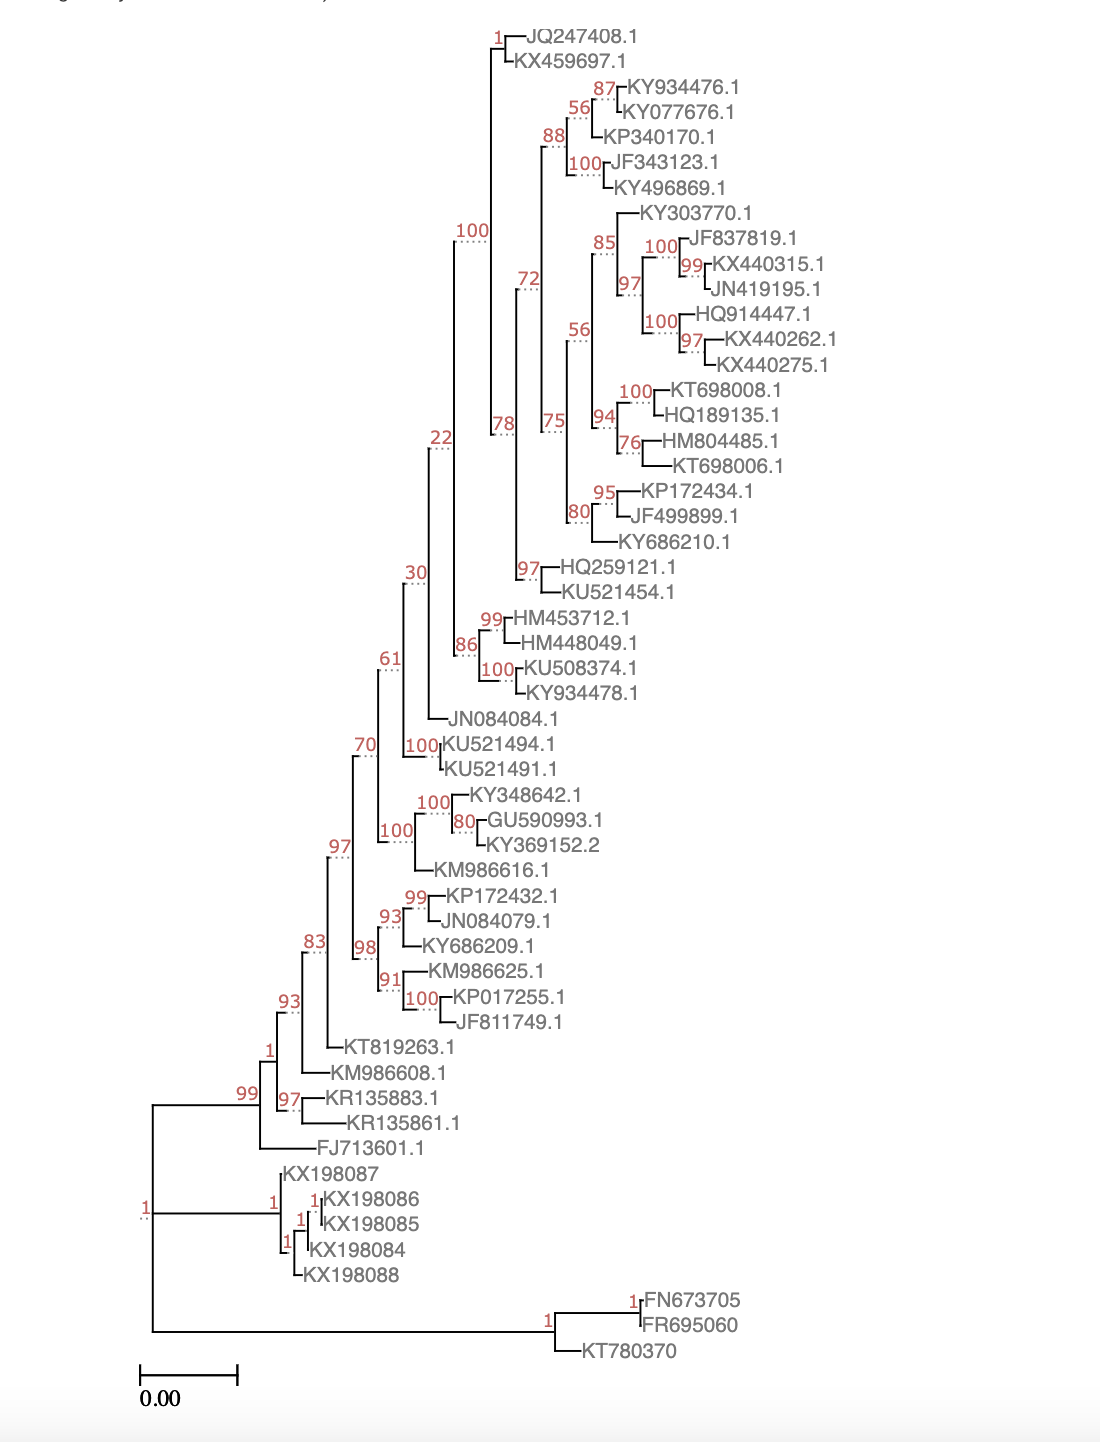

**Step 3.4. Reconstruct tree with outgoup (redo the tree completely) ✅**

To make sure our tree is ok we will completely redo it but with outgroup this time.

In [ ]:
!source activate iqtree && iqtree -s /content/extended_alignment.fasta -m TEST -bb 1000 -nt AUTO -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    a3345af3be78 (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/extended_alignment.fasta -m TEST -bb 1000 -nt AUTO -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370
Seed:    962089 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Sep 25 17:52:02 2024
Kernel:  AVX+FMA - auto-detect threads (2 CPU cores detected)

Reading alignment file /content/extended_alignment.fasta ... Fasta format detected
Reading fasta file: done in 0.0238978 secs using 85.13% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 53 sequences with 16592 columns, 476 distinct patterns
618 parsimony-informative, 310 singleton sites, 15664 constant sites
            Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 8.0063e-05

### **Result tree**

Loos kinda weird by the first sight if pay attention on nationalities only (like native americans and chinese are close to each other 🤷‍♀)️️. But if look on haplogroups it seems to be ok.

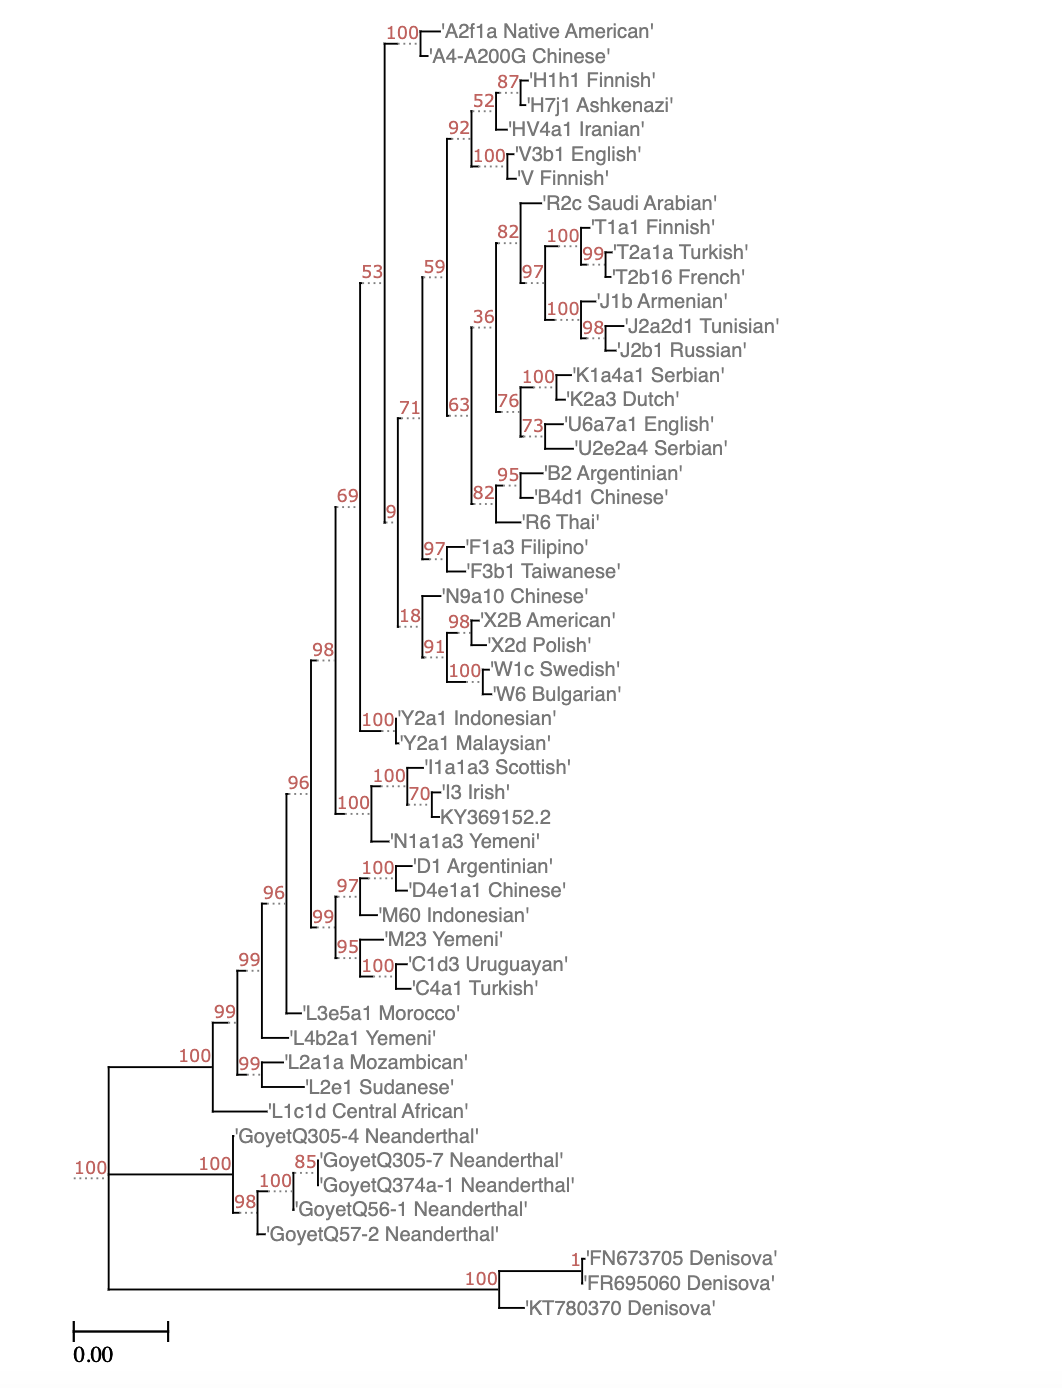

### **Step 4. Myself on the tree**

Maybe the most interesting part that far. The steps to add myself to the tree are the same to what it was before (add to allignment and construct the tree, names are also rewrite with pythone code above).

> The problem part here is to make a fasta file with mtDNA from vcf file.

That was made in different collab for no reason, but here are the steps:

1.   Pull from file only mtDNA SNPs

```
grep "^#" input.vcf > mt_variants.vcf
awk -v chrom="chrM" '$1 == chrom' my_genome.vcf >> mt_variants.vcf
```
2.   Find reference mtDNA (mine is hg19) and use bcftools to add my SNPs to the reference

```
bgzip -c /content/mt_variants.vcf > /content/mt_variants.vcf.gz
```
```
tabix -p vcf /content/mt_variants.vcf.gz
```
```
bcftools consensus -f /content/chrM_fixed.fa /content/mt_variants.vcf.gz > /content/modified_mt.fa
```
** There were some problems with reference sequence so I changed it a bit 😰.



In [5]:
!source activate mafft && mafft --add /content/modified_mt.fa --reorder /content/extended_alignment.fasta > /content/alignment_plus_me.fasta

nadd = 1
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 28 ambiguous characters.
    1 / 54
done.

Constructing a UPGMA tree (efffree=0) ... 
   50 / 54
done.

Progressive alignment 1/2... 
STEP    53 / 53  f
done.

Making a distance matrix from msa.. 
    0 / 54
done.

Constructing a UPGMA tree (efffree=1) ... 
   50 / 54
done.

Progressive alignment 2/2... 
STEP    53 / 53  f
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to

In [ ]:
!source activate iqtree && iqtree -s /content/alignment_plus_me.fasta -m TEST -bb 1000 -nt AUTO -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    a3345af3be78 (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/alignment_plus_me.fasta -m TEST -bb 1000 -nt AUTO -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370
Seed:    609329 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Sep 25 19:40:02 2024
Kernel:  AVX+FMA - auto-detect threads (2 CPU cores detected)

Reading alignment file /content/alignment_plus_me.fasta ... Fasta format detected
Reading fasta file: done in 0.0151062 secs using 99.89% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 54 sequences with 16592 columns, 513 distinct patterns
620 parsimony-informative, 1021 singleton sites, 14951 constant sites
            Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 7.2202e-05 

### **Step 5. Admire what we've done**

The tree looks great for me. This was done with the help of [ITOL](https://itol.embl.de/). And it turned out to be pretty user-friendly.

But I found that ETE Toolkit has different tutorials on how to make your tree looks great, next time try it too (it has one advantage in comparison to ITOL cause you will have code).

> **About the results**

I am the part of haplogroup H and based on what i've read that far it seems to be true. so now I'm the descendent of people "*...originated in western Asia about 30,000 years ago, arrived in Europe about 20,000-25,000 years ago, and rapidly spread to the southwest of the continent".*

** I'm the one named "NM" in bright blue light.

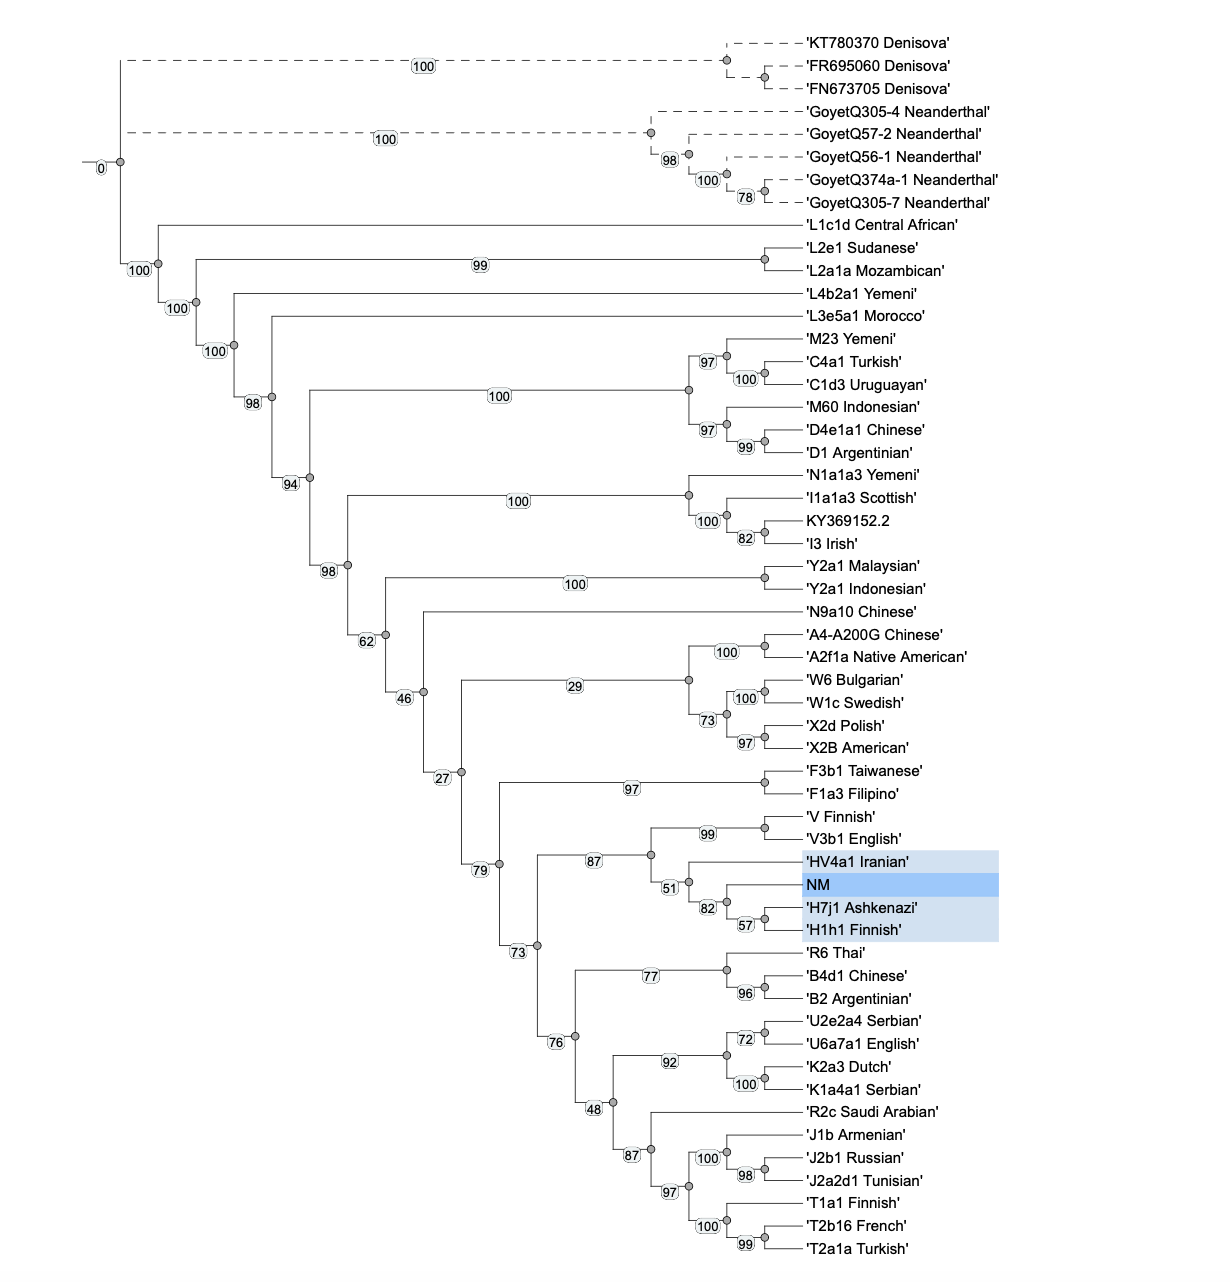